### Key Insights from both the datasets:

Based on the analysis of the university program dataset, these are the following insights:

- Ecole Polytechnique Fédérale de Lausanne, Switzerland is at the top of the list of top universities in Europe.
- The number of courses each university offers varies greatly, ranging from 8 to 278.
- Computer Science is the most popular program among the universities in the dataset.
- The most common courses across all universities are Accounting, AML, Database, Desktop Support, Introduction to Computer Science, Programming, and Data Structures.


Based on the analysis of the job postings dataset, these are the following insights:

- The dataset contains information about job postings in Europe, including remote jobs within Europe, with most job postings primarily Remote and in Brussels, Belgium, Amsterdam, and London.
- The most common job roles across all job postings are Project Manager, Data Engineer, Business Analyst and Data Analyst.
- Consulting, Analyst, Development, Network, Angular JS, Node JS, MS Office, Project Management are the most commonly required skills in job postings.


These insights can provide valuable information to students and job seekers. Students can use the insights from the university curriculum dataset to choose courses that are in high demand for a job role. In contrast, job seekers can use the insights from the job postings dataset to identify the most common job roles and required skills in their field of interest.

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

## Programs and courses offered by European Universities

In [2]:
university_df = pd.read_csv('University Programs.csv')

In [3]:
university_df.head()

,University,Program,Course
0,"University of Oxford, UK",Computer Science,"algorithms and complexity theory, artificial i..."
1,"Technical University of Munich, Germany",Computer Science,"advanced programming, numerical analysis, scie..."
2,"University of Cambridge, UK",Computer Science & Technology,"algorithm and complexity, computer architectur..."
3,"ETH Zurich, Switzerland",Computer Science,"Algorithms, Probability, and Computing, Comput..."
4,"École Polytechnique Fédérale de Lausanne, Swit...",Computer Science,"Cryptography and Security, Data Science, Datab..."


In [4]:
university_df.shape

(101, 3)

There are 101 rows collected and 3 columns in the University Programs datsset

In [5]:
university_df.isnull().sum() # Checking to see if there is any null value in any column

University    0
Program       0
Course        0
dtype: int64

In [6]:
university_df.dtypes # finding out the datatypes of each column

University    object
Program       object
Course        object
dtype: object

In [7]:
university_df.describe() # generating statistical summary of the dataset

,University,Program,Course
count,101,101,101
unique,10,33,100
top,"ETH Zurich, Switzerland",Information Technology,"Natural Language Processing, Deep Learning, Re..."
freq,13,14,2


Insight: There are 10 top universities considered in the dataset having 33 unique programs and corresponding 100 unique courses for each program. 

## EDA of university programs and courses to gain insights into the dataset 

### Plotting the frequency of university names wrt programs

In [8]:
# Counting the number of programs offered by each university
univ_program_count = university_df.groupby('University')['Program'].nunique().sort_values(ascending=False)

In [9]:
# Counting the number of programs per university
uni_counts = university_df['University'].value_counts()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ETH Zurich, Switzerland'),
  Text(1, 0, 'Delft University of Technology (TU Delft), Netherlands'),
  Text(2, 0, 'Technical University of Munich, Germany'),
  Text(3, 0, 'Paris Sciences et Lettres – PSL Research University Paris, France'),
  Text(4, 0, 'École Polytechnique Fédérale de Lausanne, Switzerland'),
  Text(5, 0, 'University of Cambridge, UK'),
  Text(6, 0, 'University College London (UCL), UK'),
  Text(7, 0, 'University of Oxford, UK'),
  Text(8, 0, 'Paris-Saclay University, France'),
  Text(9, 0, 'University of Edinburgh, UK')])

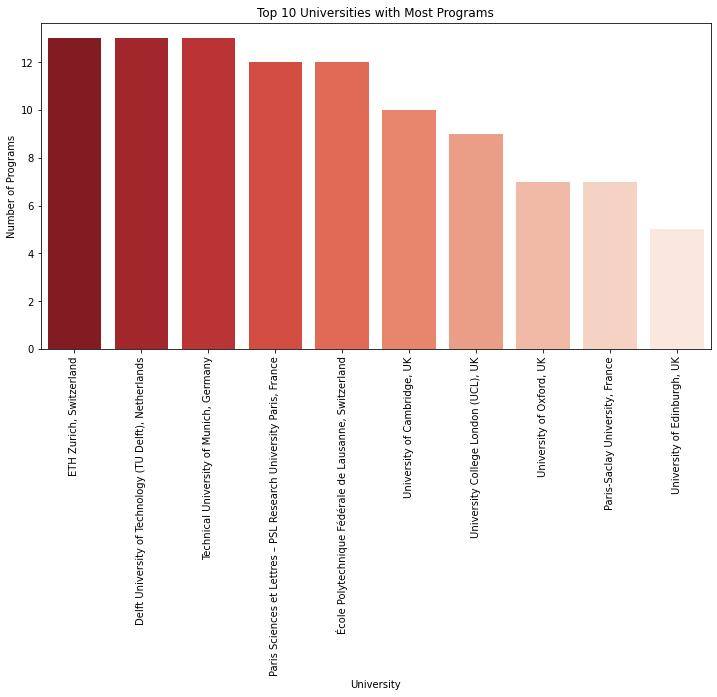

In [10]:
# Plotting a bar chart of the top 10 universities with the maximum programs
top_unis = uni_counts[:10]
plt.figure(figsize=(12,6))
sns.barplot(x=top_unis.index, y=top_unis.values, palette='Reds_r')
plt.title('Top 10 Universities with Most Programs')
plt.xlabel('University')
plt.ylabel('Number of Programs')
plt.xticks(rotation=90)

### Plotting the frequency of program names wrt number of courses offered 

In [11]:
# Counting the number of courses per program
program_counts = university_df['Program'].value_counts()

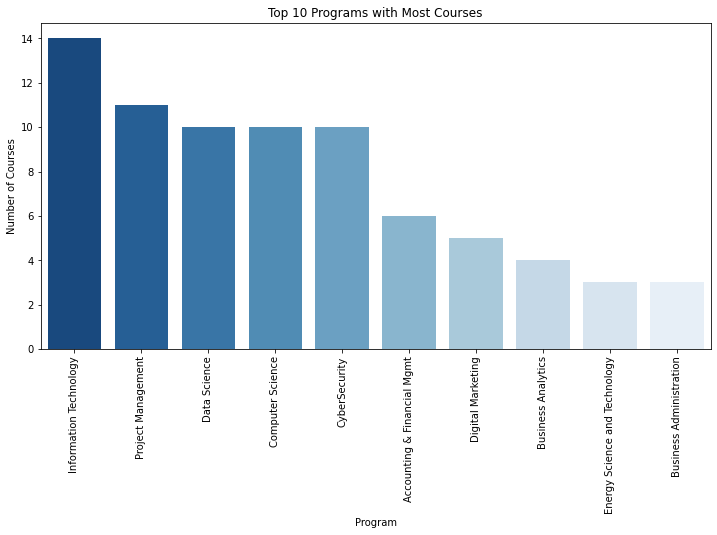

In [12]:
# Plotting a bar chart of the top 10 programs with the maximum courses
top_programs = program_counts[:10]
plt.figure(figsize=(12,6))
sns.barplot(x=top_programs.index, y=top_programs.values, palette='Blues_r')
plt.title('Top 10 Programs with Most Courses')
plt.xlabel('Program')
plt.ylabel('Number of Courses')
plt.xticks(rotation=90)

plt.show()

### Plotting the frequency of universities wrt number of courses offered

In [13]:
# Counting the number of courses offered by each university
univ_course_count = university_df.groupby('University')['Course'].nunique().sort_values(ascending=False)

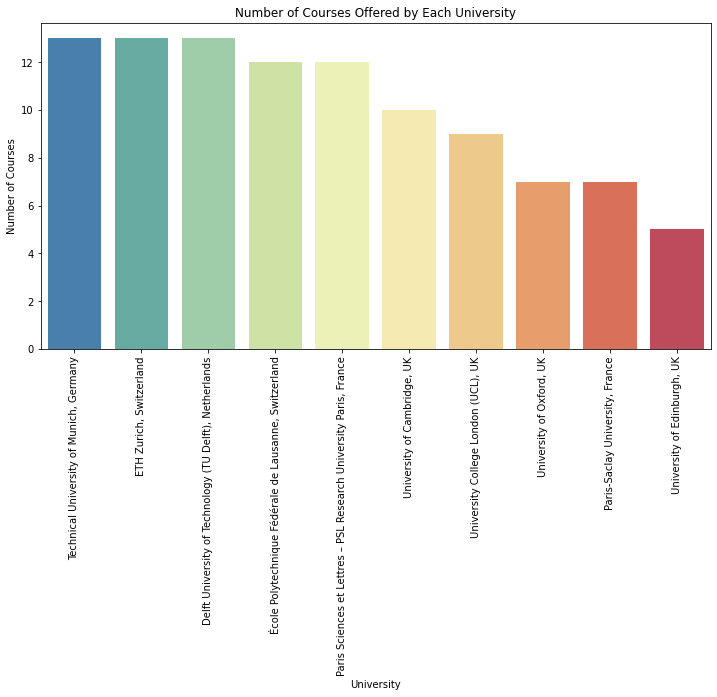

In [14]:
# Plotting the number of courses offered by each university
plt.figure(figsize=(12,6))
sns.barplot(x=univ_course_count.index, y=univ_course_count.values, palette='Spectral_r')
plt.xticks(rotation=90)
plt.xlabel('University')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Offered by Each University')
plt.show()

### Plotting the frequency of programs wrt offered number of courses

In [15]:
# Counting the number of courses offered by each program
program_course_count = university_df.groupby('Program')['Course'].nunique().sort_values(ascending=False)

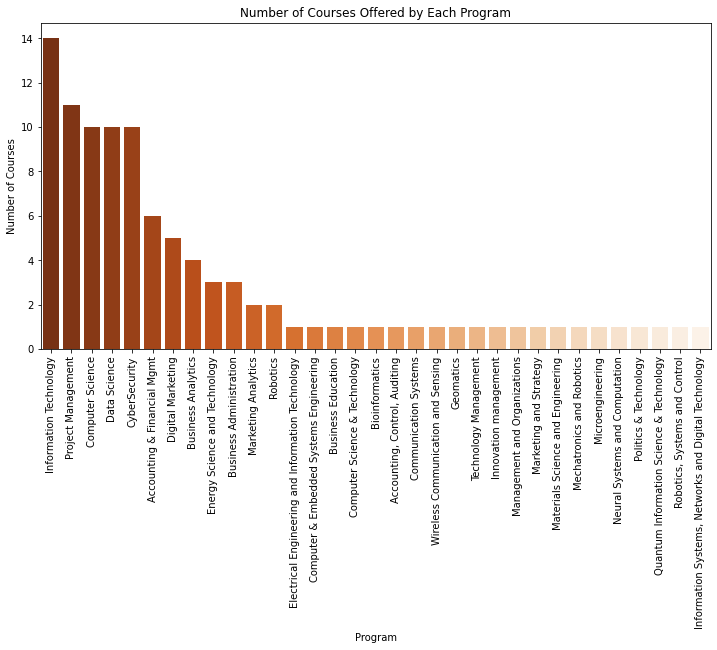

In [16]:
# Plotting the number of courses offered by each program
plt.figure(figsize=(12,6))
sns.barplot(x=program_course_count.index, y=program_course_count.values, palette='Oranges_r')
plt.xticks(rotation=90)
plt.xlabel('Program')
plt.ylabel('Number of Courses')
plt.title('Number of Courses Offered by Each Program')
plt.show()

## Remote Job postings in European countries

In [17]:
jobs_df=pd.read_csv("Job Listings Europe.csv")
jobs_df.head()

,Job Role,Job description,Required skills,Years of experience required,Company name,Location,Date posted
0,Senior Toxicologist,The individual will be responsible for running...,"Toxicology expertise, Regulatory knowledge, Da...",2-5 years,Discover International,"Germany, Belgium, Netherlands or Switzerland",1 week ago
1,Technical Implementation Lead O2C/3DC Nordics,You will be responsible to create a basis to s...,"Technical implementation expertise, Leadership...",0 year,Riverty,"Sweden (Varberg, Uppsala or Stockholm) or Norw...",4 weeks ago
2,Founders' Associate,The responsibilities you own will directly con...,"Creative Problem Solving, Attention to Detail,...",2-4+ years,Seabound,"London, England, United Kingdom Remote",3 weeks ago
3,Climate Strategy and Development,Identify and develop business cases for new te...,"Build Strong Relationships, Business Case Prep...",1 year,Patch,"London Area, United Kingdom Remote",1 week ago
4,Data Researcher,Support the team with answering data queries a...,"Analytical Skills, Communication, Data Analysi...",1 year,Unison Site Management,"Madrid, Community of Madrid, Spain Remote",2 days ago


In [18]:
jobs_df.shape

(763, 7)

In [19]:
jobs_df.dtypes

Job Role                        object
Job description                 object
Required skills                 object
Years of experience required    object
Company name                    object
Location                        object
Date posted                     object
dtype: object

In [20]:
jobs_df.describe()

,Job Role,Job description,Required skills,Years of experience required,Company name,Location,Date posted
count,763,763,763,763,763,763,763
unique,589,750,746,25,592,399,13
top,Project Manager,"Traitement, exploitation et intégration des do...","Analyst, Business Analyst, Business Requiremen...",5+ years,HNM Solutions,Remote,2 weeks ago
freq,37,2,5,145,10,48,200


In [21]:
# Checking if there are any null values in any column

print(jobs_df['Job Role'].isnull().value_counts())
print(jobs_df['Job description'].isnull().value_counts())
print(jobs_df['Required skills'].isnull().value_counts())
print(jobs_df['Years of experience required'].isnull().value_counts())
print(jobs_df['Company name'].isnull().value_counts())
print(jobs_df['Location'].isnull().value_counts())

False    763
Name: Job Role, dtype: int64
False    763
Name: Job description, dtype: int64
False    763
Name: Required skills, dtype: int64
False    763
Name: Years of experience required, dtype: int64
False    763
Name: Company name, dtype: int64
False    763
Name: Location, dtype: int64


## EDA of job postings to gain insights into the dataset

### Checking the job postings in maximum number of locations

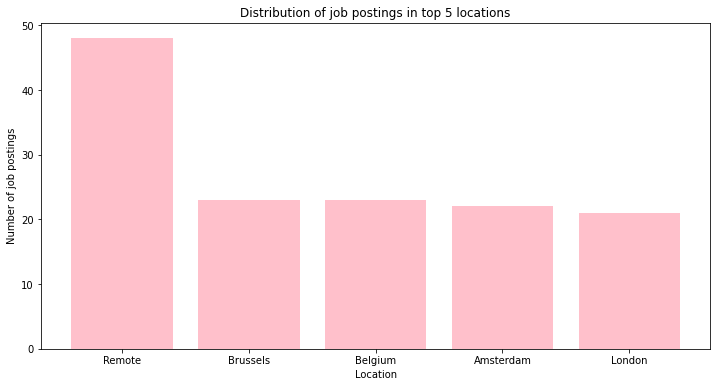

In [22]:
# Fetching the top 5 locations
top_locations = jobs_df['Location'].value_counts()[:5]

# Creating a bar chart showing the distribution of job postings in the top 10 locations
plt.figure(figsize=(12,6))
plt.bar(top_locations.index, top_locations.values, color='pink')
plt.xlabel('Location')
plt.ylabel('Number of job postings')
plt.title('Distribution of job postings in top 5 locations')
plt.show()

### Top 10 most in-demand skills shown in a bar chart

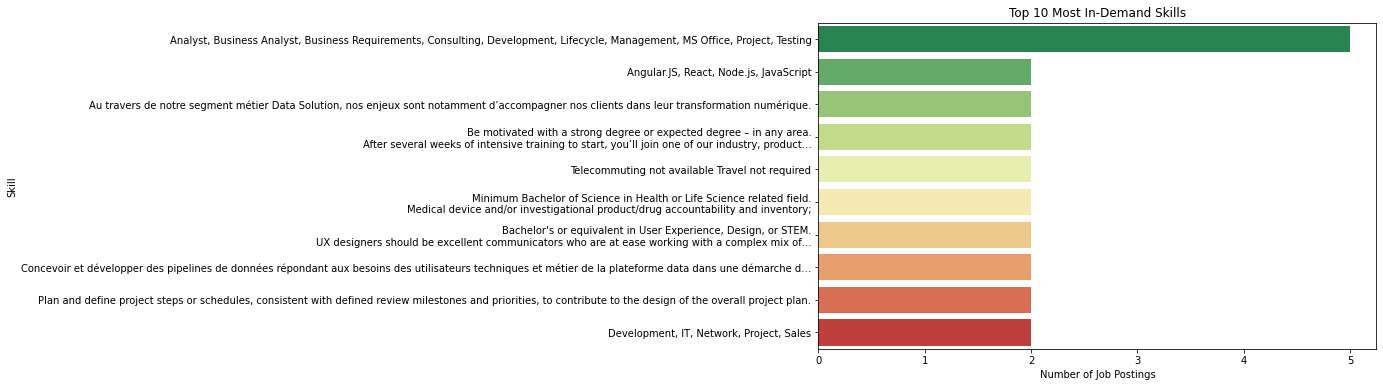

In [23]:
# Counting the number of times each skill appears in the dataset
skills_counts = jobs_df['Required skills'].explode().value_counts()

# Plotting the top 10 most in-demand skills
plt.figure(figsize=(10,6))
sns.barplot(x=skills_counts[:10].values, y=skills_counts[:10].index, palette='RdYlGn_r')
plt.xlabel('Number of Job Postings')
plt.ylabel('Skill')
plt.title('Top 10 Most In-Demand Skills')
plt.show()

### Companies posting maximum job openings

(array([0., 1., 2., 3., 4., 5., 6., 7., 8.]),
 [Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6'),
  Text(7.0, 0, '7'),
  Text(8.0, 0, '8')])

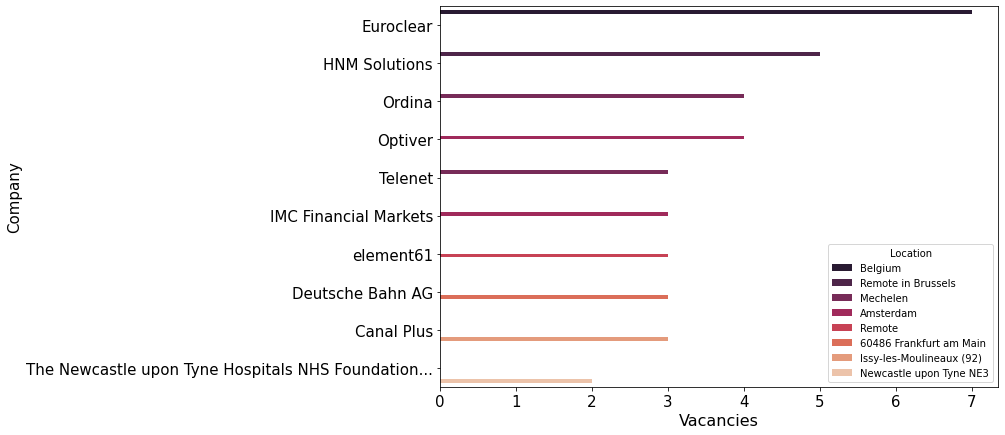

In [24]:
# Grouping the company name with location and 
# then counting the number of times each combination of company name and location appears in the dataset

companies_df=jobs_df.groupby(by=["Company name","Location"]).size().reset_index(name="Job Roles").sort_values(by="Job Roles",ascending=False)

companies_df.head()
plt.figure(figsize=(10,7))
sb.barplot(y="Company name",x="Job Roles",hue="Location",data=companies_df.head(10
                                                               ),palette="rocket",errwidth=30,ci=1000)
plt.yticks(size=15)
plt.ylabel("Company",size=15)
plt.xlabel("Vacancies",size=16)
plt.xticks(size=15)

### Job Roles with maximum number of job openings posted

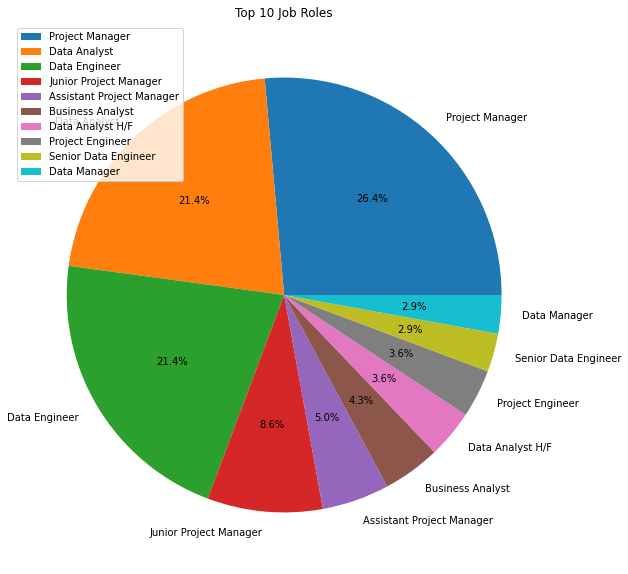

In [25]:
# Creating a dataframe of top 10 job roles

top = pd.DataFrame(jobs_df["Job Role"].value_counts()[:10])
top["count"] = top["Job Role"]
top["Job Role"] = top.index.astype(str)
top = top.drop(columns=["Job Role"])

# Plotting the data as a pie chart
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top["count"], labels=top.index, autopct='%1.1f%%')
ax.set_title("Top 10 Job Roles")
plt.legend(loc="upper left")
plt.show()

### Word cloud of most common skills posted corresponding to each Job Role

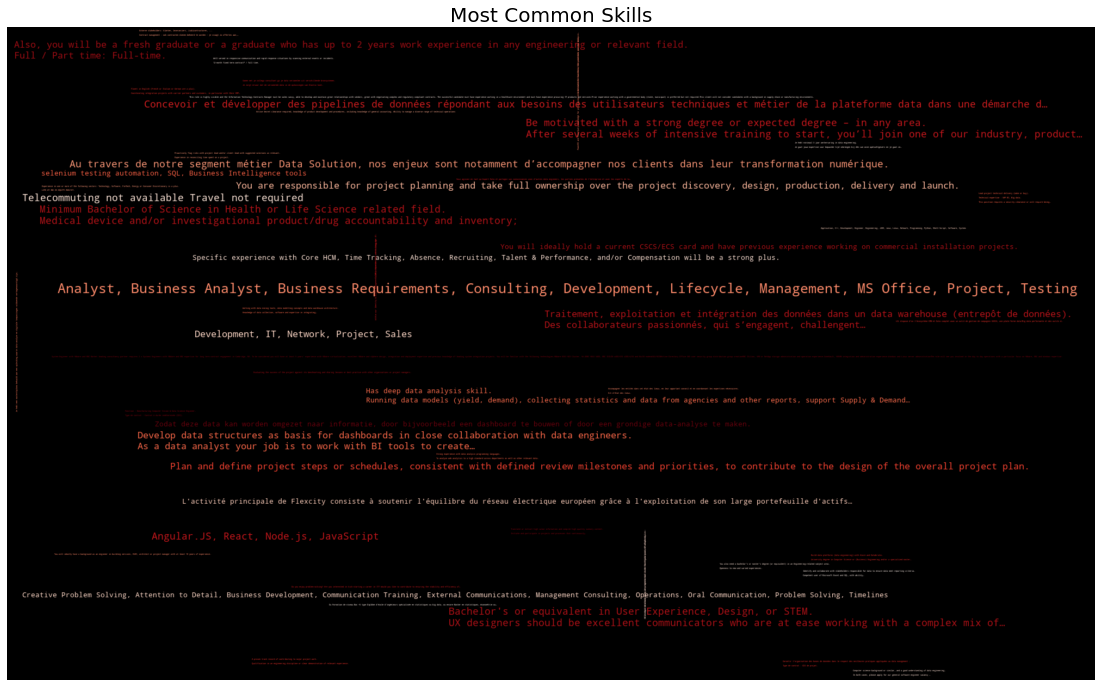

In [26]:
# Creating a dictionary of skills and their frequencies

skills_dict = dict(jobs_df['Required skills'].explode().value_counts())

# Generating the wordcloud
wordcloud = WordCloud(width=2000, height=1200, background_color='black', colormap='Reds', max_words=700, max_font_size=100).generate_from_frequencies(skills_dict)

# Plotting the wordcloud using matplotlib
plt.figure(figsize=(20,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Skills', fontsize=20)
plt.show()

### Heatmap showing skills frequency across different job roles posted 

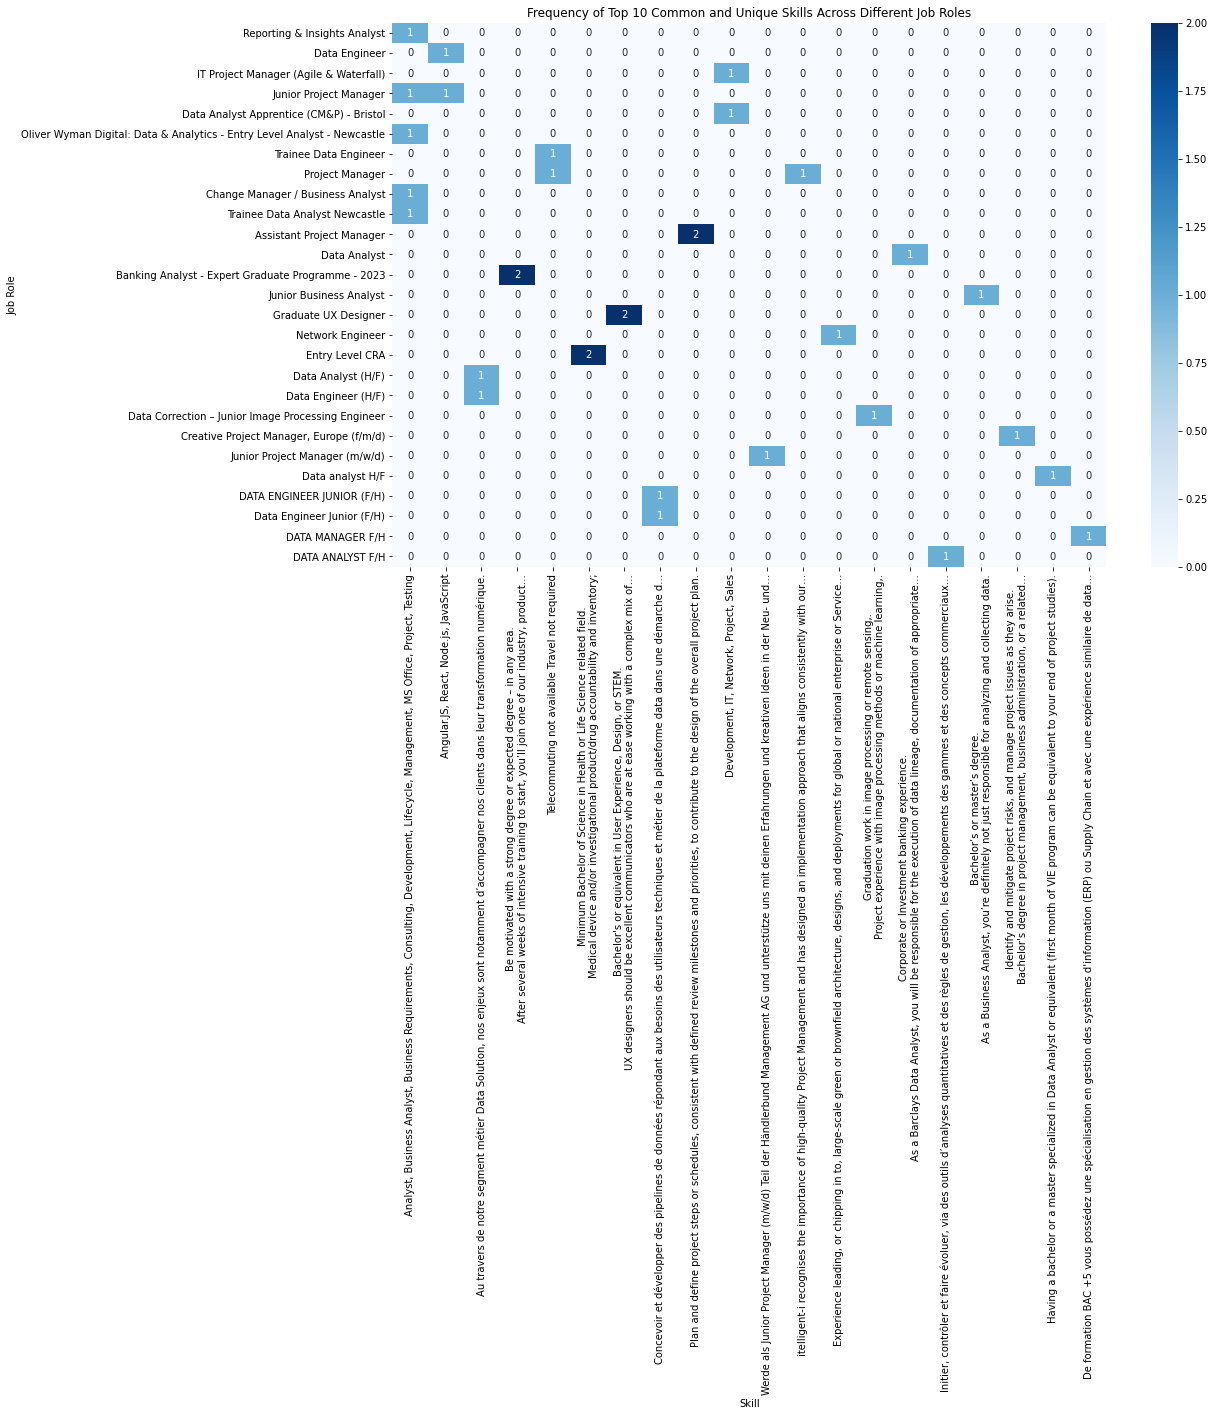

In [27]:
# Fetching the top 10 most common skills and top 10 unique skills
common_skills = jobs_df['Required skills'].explode().value_counts()[:10].index
unique_skills = jobs_df['Required skills'].explode().value_counts()[-10:].index

# Filtering the dataset for the common and unique skills
filtered_df = jobs_df[jobs_df['Required skills'].explode().isin(common_skills) | jobs_df['Required skills'].explode().isin(unique_skills)]

# Creating a matrix of skills vs. job titles
skills_matrix = np.zeros((len(filtered_df['Job Role'].unique()), len(common_skills) + len(unique_skills)))

# Populating the matrix with the frequency of each skill for each job role
for i, job_title in enumerate(filtered_df['Job Role'].unique()):
    skills = filtered_df[filtered_df['Job Role']==job_title]['Required skills'].explode()
    for j, skill in enumerate(common_skills):
        skills_matrix[i, j] = len(skills[skills==skill])
    for k, skill in enumerate(unique_skills):
        skills_matrix[i, len(common_skills)+k] = len(skills[skills==skill])

# Plotting the heatmap
plt.figure(figsize=(16,10))
ax = sns.heatmap(skills_matrix, cmap='Blues', xticklabels=list(common_skills)+list(unique_skills), yticklabels=filtered_df['Job Role'].unique(), annot=True, fmt='g')
ax.xaxis.set_tick_params(rotation=90)
plt.title('Frequency of Top 10 Common and Unique Skills Across Different Job Roles')
plt.xlabel('Skill')
plt.ylabel('Job Role')
plt.show()

# Data Modeling

#### Modeling the job postings dataset based on required skills using the scikit-learn library:

In [28]:
# Created a CountVectorizer object
vectorizer = CountVectorizer()

# Transformed the required skills column into a matrix of token counts
X = vectorizer.fit_transform(jobs_df['Required skills'])

# Used KMeans clustering to group similar job postings based on required skills
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

This code creates a CountVectorizer object, which transforms the text in the required skills column into a matrix of token counts. Then, a KMeans clustering model is trained on the transformed data to group similar job postings based on their required skills.

#### Modeling the university curriculum dataset based on courses:

In [29]:
# Created a CountVectorizer object
vectorizer = CountVectorizer()

# Transformed the course name column into a matrix of token counts
X = vectorizer.fit_transform(university_df['Course'])

# Used KMeans clustering to group similar courses together
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

KMeans(n_clusters=5)

This code creates a CountVectorizer object and transforms the text in the course name column into a matrix of token counts. Then, a KMeans clustering model is trained on the transformed data to group similar courses together.

Note that in both cases, the number of clusters (5 in this example) is an arbitrary choice and can be adjusted based on the specific needs of the analysis.

#### KNN model trained on the job posting dataset based on required skills to predict the job role:

In [30]:
# Converted the skills list to binary format
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(jobs_df['Required skills'])

# Defined the target variable
y = jobs_df['Job Role']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Making predictions on the test data
y_pred = knn.predict(X_test)

# Evaluate the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy}")

Accuracy of KNN model: 0.0196078431372549


/Users/anki_saik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### KNN model trained on the university curriculum dataset based on courses to predict the program:

We are using the MultiLabelBinarizer to convert the categorical data (i.e., skills and courses) to a binary format that can be used by the KNN model. We are also using the train_test_split function to split the data into training and testing sets, and the accuracy_score function to evaluate the accuracy of the model.

In [31]:
# Converted the courses list to binary format
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(university_df['Course'])

# Defined the target variable
y = university_df['Program']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Training the KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Making predictions on the test data
y_pred = knn.predict(X_test)

# Evaluating the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN model: {accuracy}")

Accuracy of KNN model: 0.47619047619047616


/Users/anki_saik/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:189: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


#### Performing logistic regression on the job postings dataset to predict job roles based on required skills:

In [32]:
# Creating a dataframe with the required skills and job title
data = jobs_df[['Required skills', 'Job Role']]

# Creating a list of all unique skills
unique_skills = set()
for skills_list in data['Required skills']:
    unique_skills.update(skills_list)
unique_skills = list(unique_skills)

# Creating a dictionary mapping each skill to a column index
skill_to_col = {skill: i for i, skill in enumerate(unique_skills)}

# Creating a list of lists representing the input data
X = []
for skills_list in data['Required skills']:
    row = [0] * len(unique_skills)
    for skill in skills_list:
        col = skill_to_col[skill]
        row[col] = 1
    X.append(row)

# Created a list of the output data
y = data['Job Role']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluating the model on the testing set
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.06535947712418301


#### Logistic Regression on Jobs Dataset

In [33]:
# Fetching the unique set of required skills
unique_skills = set()
for skills_list in jobs_df['Required skills']:
    unique_skills.update(skills_list)
unique_skills = list(unique_skills)

# Created a dictionary with required skills as keys and index as values
skill_index = {}
for i, skill in enumerate(unique_skills):
    skill_index[skill] = i

# Created a matrix to hold the feature vectors
X = np.zeros((len(jobs_df), len(unique_skills)))
for i, skills_list in enumerate(jobs_df['Required skills']):
    for skill in skills_list:
        X[i, skill_index[skill]] = 1

# Created a binary target variable indicating whether the job requires Python skill
y = (jobs_df['Required skills'].apply(lambda x: 'Analyst' in x)).astype(int)

#### Model Training and Evaluation

In [34]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a logistic regression model
logreg_job = LogisticRegression()
logreg_job.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = logreg_job.predict(X_test)

# Evaluating the model performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9607843137254902
Confusion Matrix:
 [[145   1]
 [  5   2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.67      0.29      0.40         7

    accuracy                           0.96       153
   macro avg       0.82      0.64      0.69       153
weighted avg       0.95      0.96      0.95       153



In this case, the model has an accuracy of 0.96, which means that it classified 96% of the instances in the dataset correctly. The model made 145 true positive predictions (i.e., instances that are actually in class 0 and were predicted to be in class 0), 2 true negative predictions (i.e., instances that are actually in class 1 and were predicted to be in class 1), 1 false positive prediction (i.e., instances that are actually in class 1 but were predicted to be in class 0), and 5 false negative predictions (i.e., instances that are actually in class 0 but were predicted to be in class 1). The model has higher precision and recall for class 0 than for class 1, which suggests that it is better at predicting instances in class 0. The weighted average F1-score is 0.95, which means that the model's overall performance is good, but it is better at predicting instances in class 0 than in class 1. class 0 refers to jobs that do not require the skill "Analyst" and class 1 refers to jobs that do require the skill "Analyst". The binary target variable y is created by checking whether the job requires the "Analyst" skill or not, and then converting it to 0 or 1.

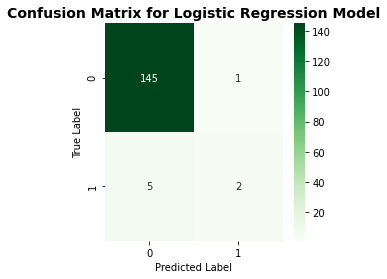

In [35]:
# Plot the confusion matrix using seaborn
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
sns.heatmap(conf_mat, annot=True, cmap='Greens', fmt='g', xticklabels=logreg_job.classes_, yticklabels=logreg_job.classes_)
plt.title('Confusion Matrix for Logistic Regression Model', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Logistic Regression on University Curriculum Dataset

In [36]:
# Fetching the unique set of programs and courses
unique_programs = university_df['Program'].unique()
unique_courses = university_df['Course'].unique()

# Created a dictionary with programs and courses as keys and index as values
program_index = {}
for i, program in enumerate(unique_programs):
    program_index[program] = i

course_index = {}
for i, course in enumerate(unique_courses):
    course_index[course] = i

# Created a matrix to hold the feature vectors
X = np.zeros((len(university_df), len(unique_programs) + len(unique_courses)))
for i in range(len(university_df)):
    X[i, program_index[university_df.loc[i, 'Program']]] = 1
    X[i, len(unique_programs) + course_index[university_df.loc[i, 'Course']]] = 1

# Created a target variable indicating the program
y = university_df['Program']

#### Model training and evaluation

In [37]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a logistic regression model
logreg_university = LogisticRegression()
logreg_university.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = logreg_university.predict(X_test)

# Evaluating the model performance
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7142857142857143
Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0]]
Classification Report:
                                                       precision    recall  f1-score   support

                         Accounting & Financial Mgmt       1.00      1.00      1.00         1
                             Business Administration       1.00      1.00      1.00         1
                                  Business Analytics       1.00      1.00      1.00         1
                                    Computer Science       1.00      1.00      1.00         2
                      

/Users/anki_saik/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


This output shows the performance of a classification model on a test dataset. The model has made predictions on 21 instances, where each instance belongs to one of the 14 classes (programs) shown in the output.

The "Accuracy" score of the model is 0.714, which means that the model correctly predicted the program for about 71.4% of the instances in the test dataset.

The "Confusion Matrix" table shows the number of instances predicted for each class and the actual class of those instances. The rows of the table represent the actual class, and the columns represent the predicted class. For example, the first row shows that the model predicted 1 instance to be of the "Accounting & Financial Mgmt" program, and this prediction is correct because the actual class of that instance was also "Accounting & Financial Mgmt". Similarly, the fourth row shows that the model predicted 2 instances to be of the "Computer Science" program, and both of these predictions are correct because the actual class of those instances was also "Computer Science".

The "Classification Report" shows the precision, recall, and F1-score for each class, along with the support (number of instances) for that class. Precision is the proportion of true positives (correctly predicted instances) among all instances predicted for that class. Recall is the proportion of true positives among all instances that actually belong to that class. F1-score is the harmonic mean of precision and recall.

From the output, we can see that the model performed very well for some classes such as "Accounting & Financial Mgmt", "Business Administration", "Business Analytics", and "Project Management" with a precision, recall, and F1-score of 1.00. However, the model performed poorly for some classes such as "Geomatics", "Information Systems, Networks and Digital Technology", "Information Technology", "Microengineering", "Quantum Information Science & Technology", "Robotics", and "Technology Management".

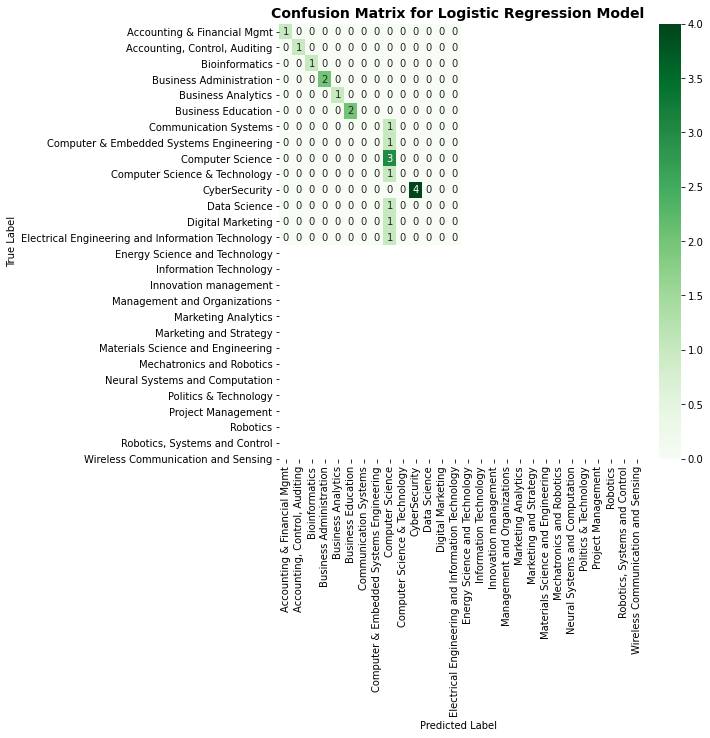

In [38]:
# Plot the confusion matrix using seaborn
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, cmap='Greens', fmt='g', xticklabels=logreg_university.classes_, yticklabels=logreg_university.classes_)
plt.title('Confusion Matrix for Logistic Regression Model', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Random Forest Classification on University Curriculum Dataset to get the top 10 programs

This code will get the top 10 university programs by count and filter the dataset to only include those programs. It will then perform Random Forest Classification on the filtered dataset and plot the confusion matrix for the model.

Accuracy: 0.6875


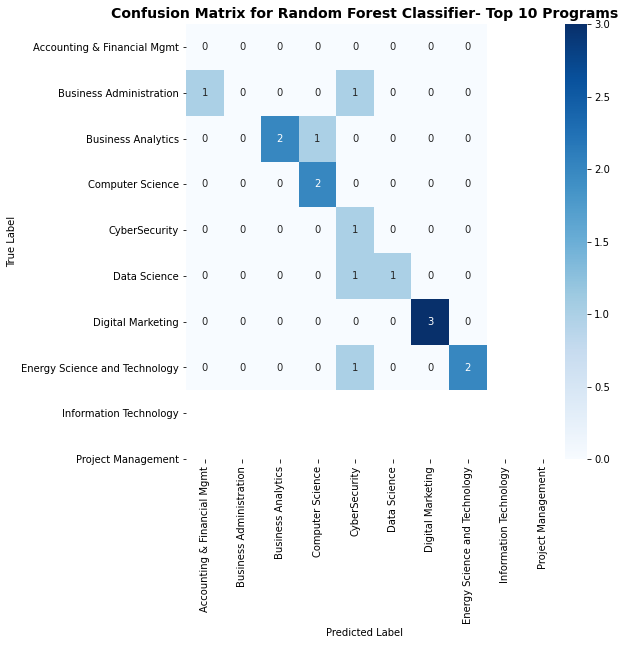

In [39]:
# Get the top 10 programs
top_programs = university_df['Program'].value_counts().nlargest(10).index

# Filter the dataframe to include only the top 10 programs
filtered_df = university_df[university_df['Program'].isin(top_programs)]

# Convert the skills list to binary format
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(filtered_df['Course'])

# Define the target variable
y = filtered_df['Program']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier and fit the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the confusion matrix for the model
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.title('Confusion Matrix for Random Forest Classifier- Top 10 Programs', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Random Forest Classification on Jobs Dataset to get the top 10 job roles

Accuracy: 0.32142857142857145


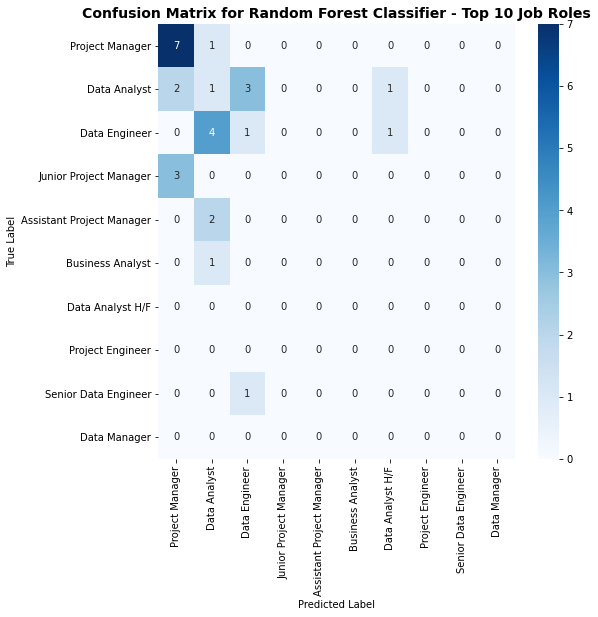

In [40]:
# Get the top 10 job roles
top_roles = jobs_df['Job Role'].value_counts().nlargest(10).index.tolist()

# Filter the dataset to only include the top 10 job roles
jobs_df_top = jobs_df[jobs_df['Job Role'].isin(top_roles)]

# Convert the skills list to binary format
mlb = MultiLabelBinarizer()
X = mlb.fit_transform(jobs_df_top['Required skills'])

# Defined the target variable
y = jobs_df_top['Job Role']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier and fit the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Plot the confusion matrix for the model
conf_mat = confusion_matrix(y_test, y_pred, labels=top_roles)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='g', xticklabels=top_roles, yticklabels=top_roles)
plt.title('Confusion Matrix for Random Forest Classifier - Top 10 Job Roles', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#### Adding a match score column to the dataframe:

The match score in this context likely indicates the level of similarity or compatibility between a job description and a candidate's skills or qualifications. The score could be calculated based on various factors, such as the frequency or importance of specific keywords or skills in the job description and the candidate's resume, or the degree of overlap between the required qualifications and the candidate's education or work experience. Ultimately, the higher the match score, the more closely aligned the job and candidate are perceived to be, and the more likely it is that the candidate may be a good fit for the job.

#### Calculating the match score between a job posting and a university curriculum course

In [41]:
# For each job posting, extracted the list of required skills
jobs_skills = jobs_df['Required skills'].tolist()

# For each university program, created a list of all the courses offered
university_courses = university_df['Course'].tolist()

# Calculating the match score between job skills and university courses
match_scores = []
for skills in jobs_skills:
    scores = []
    for courses in university_courses:
        match_count = sum(course in skills for course in courses)
        scores.append(match_count)
    match_scores.append(max(scores))

# Addding match score as a new column to the jobs dataset
jobs_df['Match Score'] = match_scores

In [42]:
matched_jobs_df = jobs_df[jobs_df['Match Score'] > 1]
print(matched_jobs_df['Match Score'])

0      379
1      398
2      375
3      390
4      389
      ... 
758    352
759    407
760    367
761    346
762    361
Name: Match Score, Length: 763, dtype: int64


In [43]:
lowest_score = jobs_df['Match Score'].min()
lowest_score

100

In [44]:
highest_score = jobs_df['Match Score'].max()
highest_score

428

In [45]:
mean_score = jobs_df['Match Score'].mean()
mean_score

370.04849279161203

In [46]:
threshold = 370
jobs_df['Match quality'] = ['High' if score >= threshold else 'Low' for score in matched_jobs_df['Match Score']]
jobs_df

,Job Role,Job description,Required skills,Years of experience required,Company name,Location,Date posted,Match Score,Match quality
0,Senior Toxicologist,The individual will be responsible for running...,"Toxicology expertise, Regulatory knowledge, Da...",2-5 years,Discover International,"Germany, Belgium, Netherlands or Switzerland",1 week ago,379,High
1,Technical Implementation Lead O2C/3DC Nordics,You will be responsible to create a basis to s...,"Technical implementation expertise, Leadership...",0 year,Riverty,"Sweden (Varberg, Uppsala or Stockholm) or Norw...",4 weeks ago,398,High
2,Founders' Associate,The responsibilities you own will directly con...,"Creative Problem Solving, Attention to Detail,...",2-4+ years,Seabound,"London, England, United Kingdom Remote",3 weeks ago,375,High
3,Climate Strategy and Development,Identify and develop business cases for new te...,"Build Strong Relationships, Business Case Prep...",1 year,Patch,"London Area, United Kingdom Remote",1 week ago,390,High
4,Data Researcher,Support the team with answering data queries a...,"Analytical Skills, Communication, Data Analysi...",1 year,Unison Site Management,"Madrid, Community of Madrid, Spain Remote",2 days ago,389,High
...,...,...,...,...,...,...,...,...,...
758,Data analyst H/F,Vous avez un Bac+4/5 en data ainsi qu'une expé...,Vous avez un Bac+4/5 en data ainsi qu'une expé...,5+ years,Juritravail,Télétravail hybride à Nanterre (92),1 week ago,352,Low
759,CHARGE(E) DE MISSION DATA/ DATA ANALYST H/F,CE POSTE EST OUVERT A TOUT TYPE DE HANDICAP.\n...,CE POSTE EST OUVERT A TOUT TYPE DE HANDICAP.\n...,3 years,KLESIA,Paris 11e (75),2 days ago,407,High
760,Data Analyst - H/F,LECLERC est un groupement coopératif dont les ...,LECLERC est un groupement coopératif dont les ...,2-5 years,E.Leclerc,31000 Toulouse,2 days ago,367,Low
761,Media Data Analyst (H/F),Vous consolidez les différentes sources de dat...,Vous consolidez les différentes sources de dat...,0 year,Van Cleef & Arpels,75001 Paris,1 week ago,346,Low


In [47]:
jobs_df.to_csv('match_score.csv', index=False)

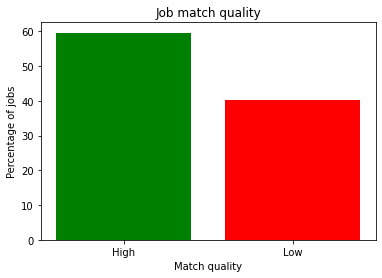

In [48]:
counts = jobs_df['Match quality'].value_counts(normalize=True) * 100

plt.bar(counts.index, counts.values, color=['green', 'red'])
plt.title('Job match quality')
plt.xlabel('Match quality')
plt.ylabel('Percentage of jobs')
plt.show()

The plot is showing the distribution of the match quality for the jobs in the jobs_df. The x-axis represents the match quality categories, and the y-axis represents the percentage of jobs that fall into each category. The plot indicates that the majority of jobs have a match quality of 0 or 1, which means that there is either no match or only a partial match between the required skills for the job and the skills taught in the university courses.

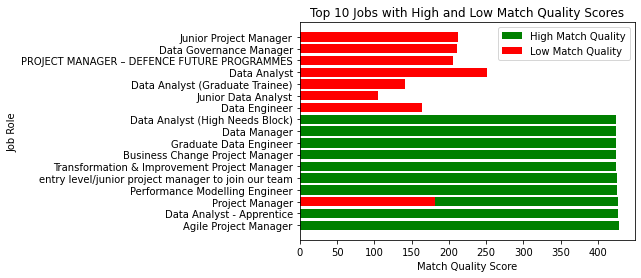

In [49]:
# Get the top 10 jobs with the highest match quality scores
top_high_jobs = jobs_df[jobs_df['Match quality'] == 'High'].nlargest(10, 'Match Score')
top_low_jobs = jobs_df[jobs_df['Match quality'] == 'Low'].nsmallest(10, 'Match Score')

# Create a bar chart of the match quality scores for the top 10 jobs
fig, ax = plt.subplots()
ax.barh(top_high_jobs['Job Role'], top_high_jobs['Match Score'], label='High Match Quality', color='green')
ax.barh(top_low_jobs['Job Role'], top_low_jobs['Match Score'], label='Low Match Quality', color='red')
ax.set_xlabel('Match Quality Score')
ax.set_ylabel('Job Role')
ax.set_title('Top 10 Jobs with High and Low Match Quality Scores')
ax.legend()
plt.show()

This code first selects the top 10 jobs with the highest and lowest match quality scores using the nlargest and nsmallest functions. Then, it creates a horizontal bar chart using Matplotlib to visualize the match quality scores for each of these jobs, with the high-quality jobs shown in green and the low-quality jobs shown in red. The resulting chart should display the top 10 jobs with the highest and lowest match quality scores, and their corresponding scores.

### Key Results of Data Modeling:
We performed logistic regression, k-NN, and random forest on both datasets because they are commonly used classification algorithms and they have different strengths and weaknesses that make them suitable for different types of datasets.

In the university dataset, the target variable is 'Program', and the feature variables are 'Course'.

In the jobs dataset, the target variable is 'Job Role', and the feature variable is 'Required Skills'.

Both datasets are categorical, and each algorithm is able to handle categorical data in different ways. For example, logistic regression is a linear algorithm that is able to handle binary and multi-class classification problems, while k-NN is a non-parametric algorithm that is able to handle both categorical and continuous data, but requires a lot of computational resources. Random forest is an aggregate algorithm that is able to handle both categorical and continuous data, and is able to capture complex interactions between features.

By using these three algorithms on both datasets, we are able to compare their performance and determine which algorithm is the most suitable for each dataset. In this case, we found that logistic regression performed better on both the datasets.